In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:

def create_commodity_price_dataframe():
    """
    Reads three CSV files with commodity price data and combines them into a single DataFrame.
    Files should be named: 
    - prices_round_1_day_0.csv
    - prices_round_1_day_1.csv
    - prices_round_1_day_2.csv
    
    Returns:
        pd.DataFrame: Combined price data from all three files
    """
    # List of files to read
    file_names = [
        'E:/Acads(Official)/SEM 6/Prosperity/Round 1/round-1-island-data-bottle/prices_round_1_day_0.csv',
        'E:/Acads(Official)/SEM 6/Prosperity/Round 1/round-1-island-data-bottle/prices_round_1_day_1.csv', 
        'E:/Acads(Official)/SEM 6/Prosperity/Round 1/round-1-island-data-bottle/prices_round_1_day_2.csv'
    ]
    
    # List to store individual dataframes
    dataframes = []
    
    # Read each file
    for file_name in file_names:
        try:
            # Check if file exists
            if not os.path.exists(file_name):
                print(f"Warning: File '{file_name}' not found.")
                continue
                
            # Read the CSV file with semicolon separator
            df = pd.read_csv(
                file_name,
                sep=';',
                na_values=[''],  # Empty fields become NaN
                keep_default_na=True
            )
            
            # Add to our list of dataframes
            dataframes.append(df)
            print(f"Successfully read '{file_name}' with {len(df)} rows.")
            
        except Exception as e:
            print(f"Error reading '{file_name}': {str(e)}")
    
    # If no data was read, return empty DataFrame
    if not dataframes:
        print("No data was read from any files.")
        return pd.DataFrame()
    
    # Combine all dataframes
    combined_df = pd.concat(dataframes, ignore_index=True)
    
    # Convert numeric columns to appropriate types
    numeric_columns = [
        'day', 'timestamp',
        'bid_price_1', 'bid_volume_1', 'bid_price_2', 'bid_volume_2', 
        'bid_price_3', 'bid_volume_3', 'ask_price_1', 'ask_volume_1', 
        'ask_price_2', 'ask_volume_2', 'ask_price_3', 'ask_volume_3', 
        'mid_price', 'profit_and_loss'
    ]
    
    for col in numeric_columns:
        if col in combined_df.columns:
            combined_df[col] = pd.to_numeric(combined_df[col], errors='coerce')
    
    return combined_df

# Run the program
if __name__ == "__main__":
    # Create the combined dataframe
    price_df = create_commodity_price_dataframe()
    
    if not price_df.empty:
        print("\nCombined DataFrame created successfully!")
        print(f"Total rows: {len(price_df)}")
        print(f"Columns: {', '.join(price_df.columns)}")
        
        # Optional: Product summary
        print("\nProducts in the dataset:")
        print(price_df['product'].value_counts())
        
        # Optional: Save combined data to a new file
        # price_df.to_csv('combined_prices.csv', index=False)
        # print("\nData saved to 'combined_prices.csv'")
    else:
        print("Failed to create combined DataFrame.")

print(price_df)

Successfully read 'E:/Acads(Official)/SEM 6/Prosperity/Round 1/round-1-island-data-bottle/prices_round_1_day_0.csv' with 30000 rows.

Combined DataFrame created successfully!
Total rows: 30000
Columns: day, timestamp, product, bid_price_1, bid_volume_1, bid_price_2, bid_volume_2, bid_price_3, bid_volume_3, ask_price_1, ask_volume_1, ask_price_2, ask_volume_2, ask_price_3, ask_volume_3, mid_price, profit_and_loss

Products in the dataset:
product
RAINFOREST_RESIN    10000
KELP                10000
SQUID_INK           10000
Name: count, dtype: int64
       day  timestamp           product  bid_price_1  bid_volume_1  \
0        0          0  RAINFOREST_RESIN         9998             1   
1        0          0              KELP         2028            30   
2        0          0         SQUID_INK         1968            30   
3        0        100         SQUID_INK         1969             4   
4        0        100              KELP         2030             4   
...    ...        ...     

In [3]:
kelp_data = price_df.where(price_df['product']=="KELP").copy()
kelp_data = kelp_data.dropna(subset=['product'])
resin_data = price_df.where(price_df['product']=="RAINFOREST_RESIN").copy()
resin_data = resin_data.dropna(subset=['product'])
ink_data = price_df.where(price_df['product']=="SQUID_INK").copy()
ink_data = ink_data.dropna(subset='product')

In [4]:
def calculate_mm_mid(row):
    # Find the best bid with volume >= 20
    for i in range(1, 4):
        if row[f'bid_volume_{i}'] >= 20:
            best_bid = row[f'bid_price_{i}']
            break
    else:
        best_bid = None

    # Find the best ask with volume >= 20
    for i in range(1, 4):
        if row[f'ask_volume_{i}'] >= 20:
            best_ask = row[f'ask_price_{i}']
            break
    else:
        best_ask = None

    # Calculate the mid price if both best bid and ask are found
    if best_bid is not None and best_ask is not None:
        return (best_bid + best_ask) / 2
    else:
        return None
kelp_data['mm_mid']=kelp_data.apply(calculate_mm_mid, axis=1)
print(kelp_data['mm_mid'])

1        2030.0
4        2030.0
8        2030.0
10       2030.5
13       2030.0
          ...  
29987    2033.5
29990    2033.5
29991    2033.5
29995    2033.5
29999    2033.5
Name: mm_mid, Length: 10000, dtype: float64


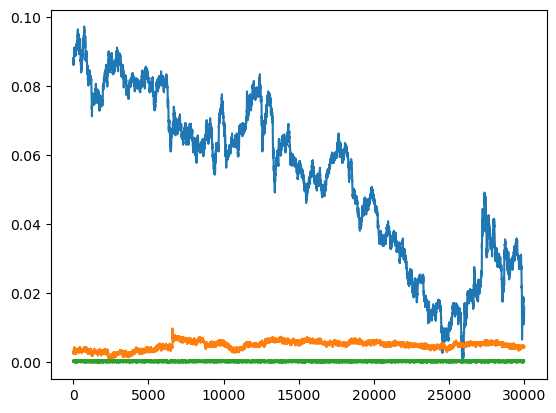

In [5]:
plt.plot((ink_data['mid_price']-np.min(ink_data['mid_price']))/np.min(ink_data['mid_price']))
plt.plot((kelp_data['mid_price']-np.min(kelp_data['mid_price']))/np.min(kelp_data['mid_price']))
plt.plot((resin_data['mid_price']-np.min(resin_data['mid_price']))/np.min(resin_data['mid_price']))

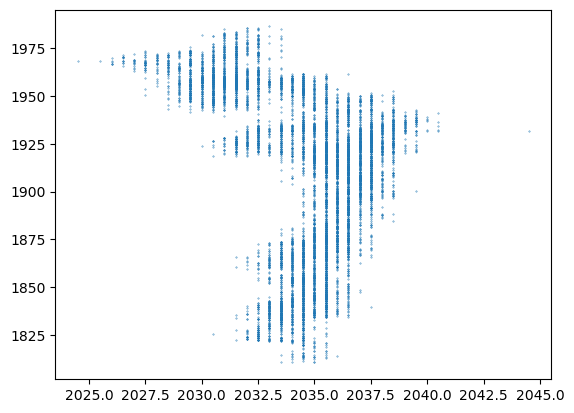

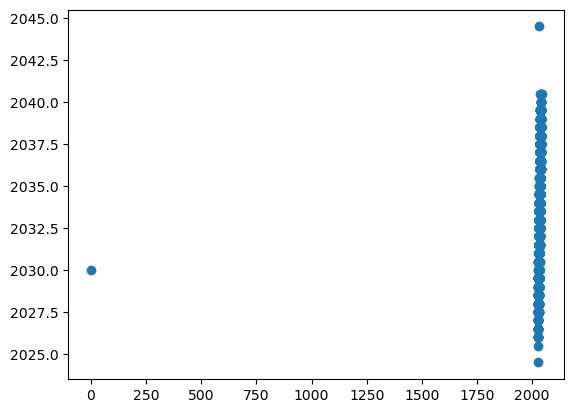

In [25]:
plt.scatter(kelp_data['mid_price'],ink_data['mid_price'], s=0.1)
plt.show()
kelp_shifted = np.pad(kelp_data['mid_price'], pad_width=1)
plt.scatter(kelp_shifted[:-2], kelp_data['mid_price'])

In [7]:
resin_data['mid_price']

0        10001.5
5         9999.0
7        10000.0
11        9997.0
12       10001.0
          ...   
29985     9998.5
29988     9999.0
29992    10000.0
29996    10000.0
29997    10000.0
Name: mid_price, Length: 10000, dtype: float64

[0.95896427 0.99950417]


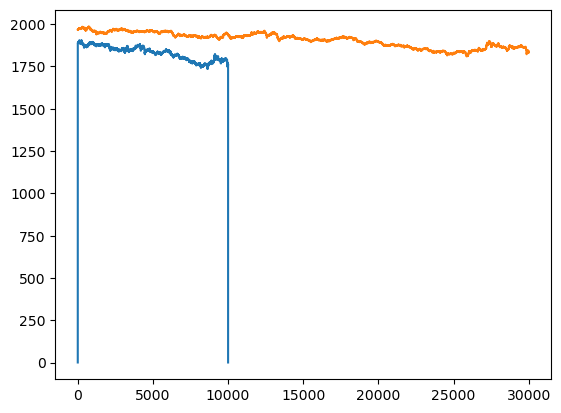

In [8]:
import numpy as np

def linear_regression(X, y):
    X_bias = np.c_[np.ones((X.shape[0], 1)), X]
    theta = np.linalg.inv(X_bias.T.dot(X_bias)).dot(X_bias.T).dot(y)
    y_pred = X_bias.dot(theta)
    y_mean = np.mean(y)
    ss_total = np.sum((y - y_mean) ** 2)
    ss_residual = np.sum((y - y_pred) ** 2)
    r_squared = 1 - (ss_residual / ss_total)
    
    return theta, r_squared

theta, r_squared = linear_regression(ink_data['mid_price'][1:], ink_shifted[1:-2])
print(theta)
plt.plot(ink_shifted * theta[0] + theta[1])
plt.plot(ink_data['mid_price'])

In [16]:
def implement_arima_for_ink_data(ink_data):
    """
    Implement ARIMA model for the SQUID_INK mid_price time series data
    
    Parameters:
    -----------
    ink_data : DataFrame
        DataFrame containing SQUID_INK data with mid_price column
    """
    # Check if mid_price column exists
    if 'mid_price' not in ink_data.columns:
        raise ValueError("mid_price column not found in ink_data DataFrame")
    
    # Sort by day and timestamp to ensure proper time series order
    ink_data = ink_data.sort_values(by=['day', 'timestamp']).reset_index(drop=True)
    
    # Extract mid_price as time series
    ts = ink_data['mid_price']
    
    print(f"Number of observations in time series: {len(ts)}")
    
    # Check for stationarity using Augmented Dickey-Fuller test
    print("\nTesting for stationarity...")
    adf_result = adfuller(ts.dropna())
    print(f'ADF Statistic: {adf_result[0]:.4f}')
    print(f'p-value: {adf_result[1]:.4f}')
    print(f'Critical Values:')
    for key, value in adf_result[4].items():
        print(f'\t{key}: {value:.4f}')
    
    # Automatically find optimal parameters
    print("\nFinding optimal ARIMA parameters...")
    auto_model = auto_arima(ts, 
                           seasonal=False, 
                           trace=True,
                           suppress_warnings=True,
                           stepwise=True,
                           error_action="ignore",
                           max_p=5, max_d=2, max_q=5)
    
    print(f"\nBest ARIMA model: {auto_model.order}")
    p, d, q = auto_model.order
    
    # Fit ARIMA model
    print("\nFitting ARIMA model...")
    model = ARIMA(ts, order=(p, d, q))
    model_fit = model.fit()
    print(model_fit.summary())
    
    # Plot diagnostics
    print("\nPlotting diagnostics...")
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    model_fit.plot_diagnostics(fig=fig)
    plt.tight_layout()
    
    # Forecast future values (next 10 time steps)
    forecast_steps = 10
    
    # Get forecast with proper confidence intervals
    forecast_result = model_fit.get_forecast(steps=forecast_steps)
    forecast = forecast_result.predicted_mean
    forecast_ci = forecast_result.conf_int()
    
    # Plot the original series and forecasts
    plt.figure(figsize=(12, 6))
    plt.plot(ts, label='Observed')
    
    forecast_index = range(len(ts), len(ts) + forecast_steps)
    plt.plot(forecast_index, forecast, color='red', label='Forecast')
    
    # Plot confidence intervals correctly
    plt.fill_between(forecast_index,
                    forecast_ci.iloc[:, 0],  # Lower bound
                    forecast_ci.iloc[:, 1],  # Upper bound
                    color='pink', alpha=0.3, label='95% Confidence Interval')
    
    plt.title('SQUID_INK Mid Price: ARIMA Forecast')
    plt.xlabel('Time Step')
    plt.ylabel('Mid Price')
    plt.legend()
    plt.grid(True)
    
    # Calculate metrics
    residuals = model_fit.resid[~np.isnan(model_fit.resid)]
    mse = np.mean(residuals**2)
    rmse = np.sqrt(mse)
    mae = np.mean(np.abs(residuals))
    
    print(f"\nModel Performance Metrics:")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")
    
    return model_fit, forecast

Number of observations in time series: 10000

Testing for stationarity...
ADF Statistic: -1.2673
p-value: 0.6440
Critical Values:
	1%: -3.4310
	5%: -2.8618
	10%: -2.5669

Finding optimal ARIMA parameters...
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=33318.976, Time=7.30 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=33786.941, Time=0.16 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=33343.111, Time=0.46 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=33346.177, Time=0.57 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=33785.925, Time=0.17 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=33316.982, Time=4.15 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=33337.831, Time=1.00 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=33340.112, Time=1.68 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=33318.976, Time=5.50 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=33331.796, Time=1.12 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=33347.089, Time=2.29 sec
 ARIMA(2,1,3)

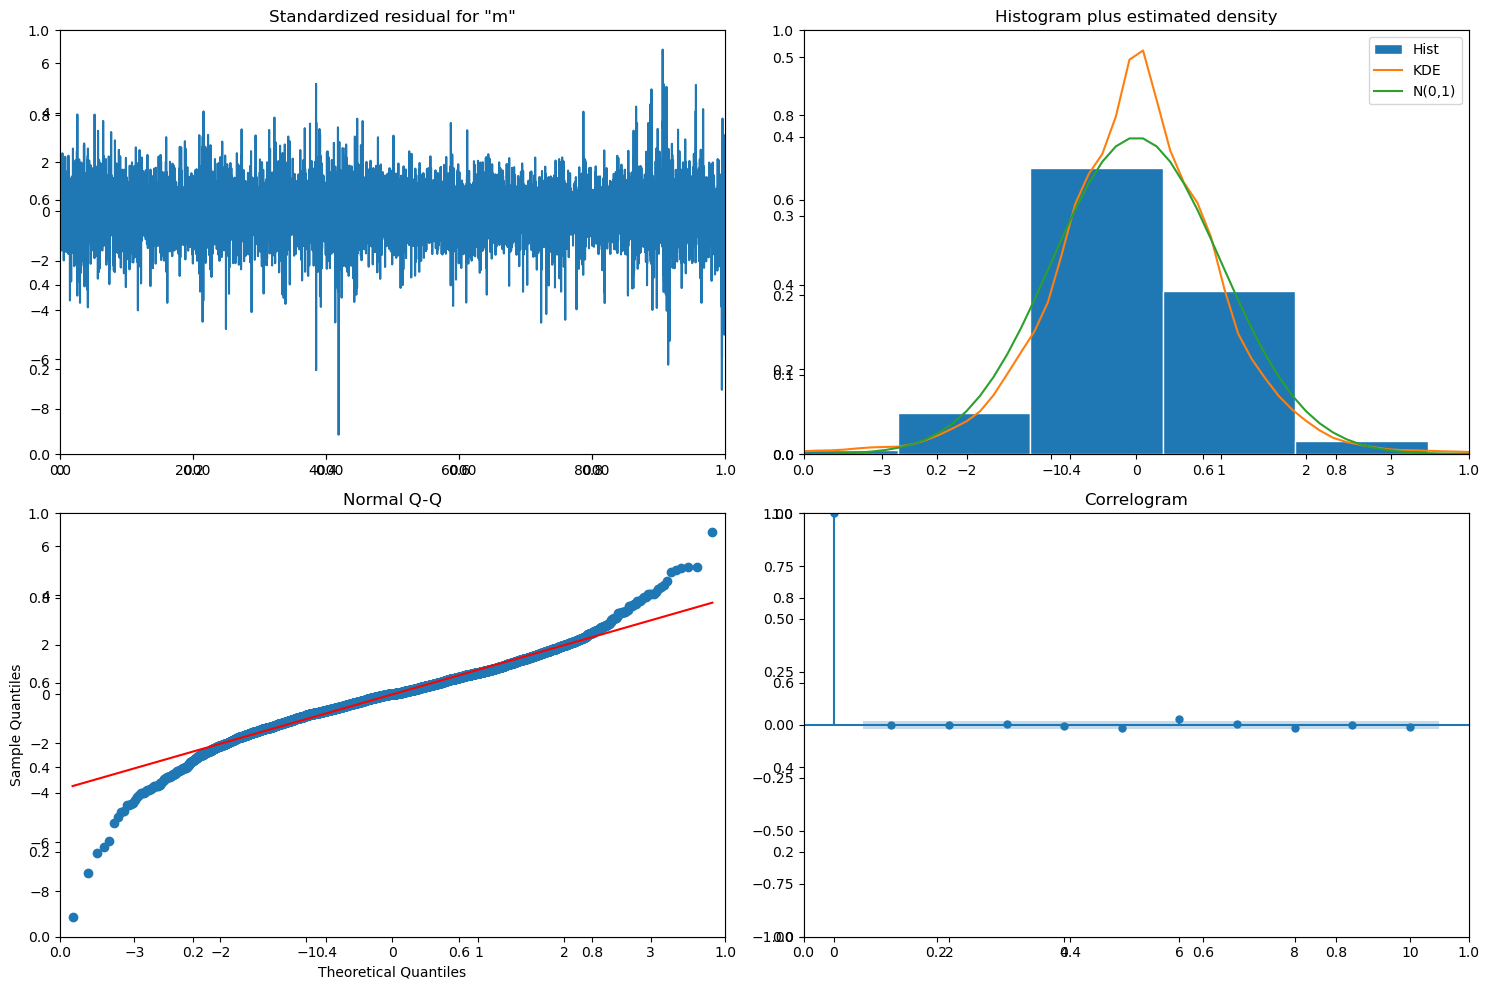

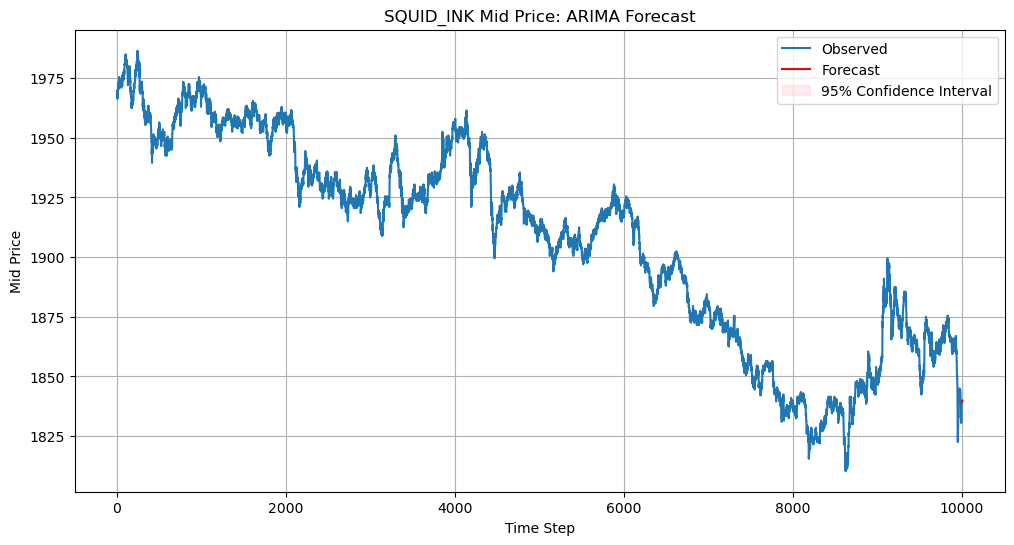

In [17]:
model_fit, forecast = implement_arima_for_ink_data(ink_data)


In [23]:
forecast

10000    1839.117272
10001    1839.278943
10002    1839.415337
10003    1839.530404
10004    1839.627480
10005    1839.709377
10006    1839.778469
10007    1839.836759
10008    1839.885934
10009    1839.927420
Name: predicted_mean, dtype: float64